# Introduction

## IMDB Netflix Originals Analysis

*The primary objective of this project is to analyze and understand the characteristics, trends, and viewer preferences of Netflix Original series and movies based on IMDb data. The project aims to derive actionable insights that could be valuable for content creators, marketers, and platform strategists in making data-driven decisions* 

# Table of Contents

The analysis utilizes a dataset named imdb.csv, comprising IMDb data related to Netflix Originals. The dataset contains 80 entries and includes the following fields:

lister-item-index: Numeric index representing the order or ranking of titles.

lister-item-header: Title of the series or movie.

certificate: Age certification of the title.

runtime: Runtime of episodes or movies, typically in minutes.

genre: Genre(s) associated with the title.

rating: IMDb rating on a scale from 1 to 10.

votes: Number of votes or ratings received on IMDb.


# Project Outcome

**The project aims to provide a thorough analysis of Netflix Originals, highlighting key trends and patterns that could influence content strategy and development. Specific outcomes might include identifying the most popular genres, understanding the relationship between ratings and viewer engagement, and potentially predicting the success of future titles based on historical data.**


# Data Loading and Initial Exploration

## Dataset Overview

Load the dataset and display basic information.

In [1]:
# Code for Dataset Overview
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the provided CSV file
file_path = '/Users/omarshakir/Desktop/IMDB Netflix Anyalytics/Data/imdb.csv'
imdb_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
imdb_data.head()

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
0,1.0,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,2.0,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,3.0,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,4.0,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,5.0,Money Heist,15,60 min,"Action, Crime, Drama",8.2,"529,086"


## Preliminary Observations

In [2]:

import pandas as pd

# Load the IMDb dataset
imdb_df = pd.read_csv('/Users/omarshakir/Desktop/IMDB Netflix Anyalytics/Data/imdb.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(imdb_df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(imdb_df.describe())

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(imdb_df.head())

# Check for any missing values
print("\nMissing Values:")
print(imdb_df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in imdb_df.select_dtypes(include=['object']).columns:
    print(f"\n{column}: {imdb_df[column].unique()}")

# Check value counts for certificate column
print("\nValue Counts for 'certificate' Column:")
print(imdb_df['certificate'].value_counts())

# Check value counts for genre column
print("\nValue Counts for 'genre' Column:")
print(imdb_df['genre'].value_counts())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.5+ KB
None

Summary Statistics for Numerical Columns:
       lister-item-index    rating
count            80.0000  80.00000
mean             40.5000   7.72000
std              23.2379   0.71235
min               1.0000   5.90000
25%              20.7500   7.20000
50%              40.5000   7.80000
75%              60.2500   8.22500
max              80.0000   8.80000

First Few Rows of th

# Data Cleaning

## Handling Missing Values

In [3]:
import pandas as pd

# Load the dataset
dataset_path = '/Users/omarshakir/Desktop/IMDB Netflix Anyalytics/Data/imdb.csv'
df = pd.read_csv(dataset_path)

# Display basic information about the dataset and missing values
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
# Remove commas from 'votes' column and convert to numeric
df['votes'] = df['votes'].str.replace(',', '').astype(float)

# Fill missing values in the 'votes' column with the median value
median_votes = df['votes'].median()
df['votes'] = df['votes'].fillna(median_votes)

# Alternatively, you can drop rows with missing values using df.dropna() or fill missing values with a specific value using df.fillna()

# Verify handling of missing values
print("\nMissing Values after Handling:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.5+ KB
None

Missing Values:
lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes                 0
dtype: int64

Missing Values after Handling:
lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes

## Data Type Corrections

Ensure each column has the appropriate data type.

In [4]:

# Load the dataset
dataset_path = '/Users/omarshakir/Desktop/IMDB Netflix Anyalytics/Data/imdb.csv'
df = pd.read_csv(dataset_path)

# Display basic information about the dataset and data types
print("Initial Data Types:")
print(df.dtypes)

# Check for unique values in each column to identify potential data type issues
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in column '{column}':")
    print(unique_values)


Initial Data Types:
lister-item-index     float64
lister-item-header     object
certificate            object
runtime                object
genre                  object
rating                float64
votes                  object
dtype: object

Unique values in column 'lister-item-index':
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80.]

Unique values in column 'lister-item-header':
['Stranger Things' '13 Reasons Why' 'Orange Is the New Black'
 'Black Mirror' 'Money Heist' 'Lucifer' 'Narcos' 'Daredevil' 'Sense8'
 'Jessica Jones' 'House of Cards' 'The End of the F***ing World' 'Dark'
 'Sex Education' 'Elite' 'You' 'Chilling Adventures of Sabrina' 'The OA'
 'The Punisher' 'The Umbrella Academy' 'Iron Fist' 'Luke Cag

In [5]:
# Convert 'certificate' to categorical data type
df['certificate'] = df['certificate'].astype('category')

# Remove ' min' suffix and convert 'runtime' to numeric
df['runtime'] = pd.to_numeric(df['runtime'].str.replace(' min', ''), errors='coerce')

# Convert 'votes' to numeric after removing commas
df['votes'] = df['votes'].str.replace(',', '').astype(float)

# Print corrected data types
print("\nCorrected Data Types:")
print(df.dtypes)



Corrected Data Types:
lister-item-index      float64
lister-item-header      object
certificate           category
runtime                float64
genre                   object
rating                 float64
votes                  float64
dtype: object


# Exploratory Data Analysis (EDA)

## Statistical Summaries

Summary statistics for numerical and categorical columns.

In [6]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{column}:")
    print(df[column].value_counts())


Summary Statistics for Numerical Columns:
       lister-item-index     runtime    rating         votes
count            80.0000   78.000000  80.00000  8.000000e+01
mean             40.5000   64.935897   7.72000  1.559946e+05
std              23.2379   86.796274   0.71235  1.974261e+05
min               1.0000   15.000000   5.90000  5.910000e+03
25%              20.7500   30.000000   7.20000  3.303600e+04
50%              40.5000   50.000000   7.80000  8.303350e+04
75%              60.2500   60.000000   8.22500  2.204090e+05
max              80.0000  572.000000   8.80000  1.327188e+06

Summary Statistics for Categorical Columns:

lister-item-header:
lister-item-header
Stranger Things       1
13 Reasons Why        1
Fuller House          1
The Order             1
RuPaul's Drag Race    1
                     ..
The Defenders         1
The Rain              1
Big Mouth             1
Atypical              1
Quicksand             1
Name: count, Length: 80, dtype: int64

certificate:
certific

In [7]:
print("\nSummary Statistics for Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{column}:")
    print(df[column].value_counts())


Summary Statistics for Categorical Columns:

lister-item-header:
lister-item-header
Stranger Things       1
13 Reasons Why        1
Fuller House          1
The Order             1
RuPaul's Drag Race    1
                     ..
The Defenders         1
The Rain              1
Big Mouth             1
Atypical              1
Quicksand             1
Name: count, Length: 80, dtype: int64

certificate:
certificate
15    53
18    20
12     4
PG     3
Name: count, dtype: int64

genre:
genre
Comedy, Drama                   8
Drama, Mystery, Sci-Fi          5
Action, Crime, Drama            5
Drama, Fantasy, Horror          4
Comedy                          4
Crime, Drama, Mystery           4
Comedy, Crime, Drama            3
Drama                           3
Action, Adventure, Crime        2
Action, Adventure, Drama        2
Animation, Comedy, Drama        2
Animation, Action, Adventure    2
Adventure, Comedy, Drama        2
Action, Drama, Sci-Fi           2
Crime, Drama, Thriller          2
C

In [8]:
# Exclude non-numeric columns before computing correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   lister-item-index   runtime    rating     votes
lister-item-index           1.000000 -0.041146 -0.275975 -0.616414
runtime                    -0.041146  1.000000  0.061614  0.037941
rating                     -0.275975  0.061614  1.000000  0.547499
votes                      -0.616414  0.037941  0.547499  1.000000


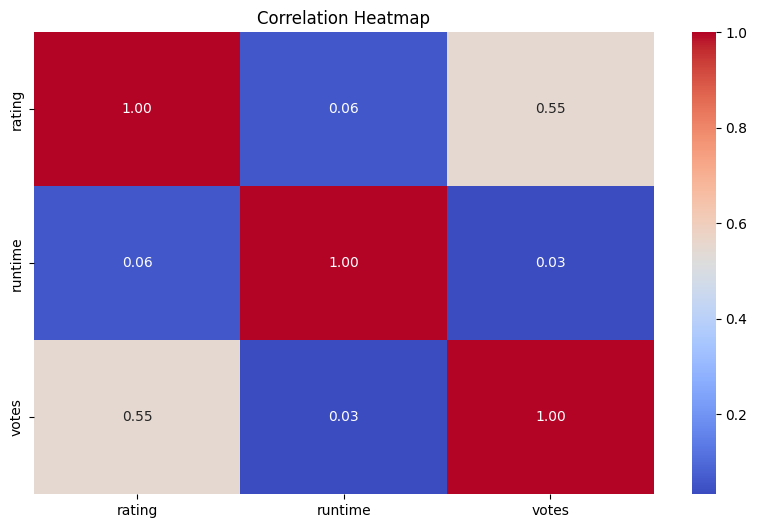

In [9]:
imdb_data['runtime'] = imdb_data['runtime'].str.extract('(\d+)').astype(float)
imdb_data['votes'] = imdb_data['votes'].str.replace(',', '').astype(float)

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = imdb_data[['rating', 'runtime', 'votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


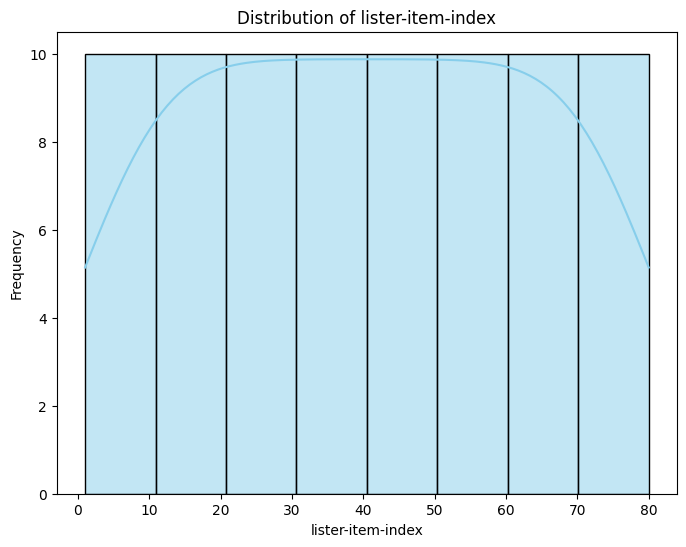

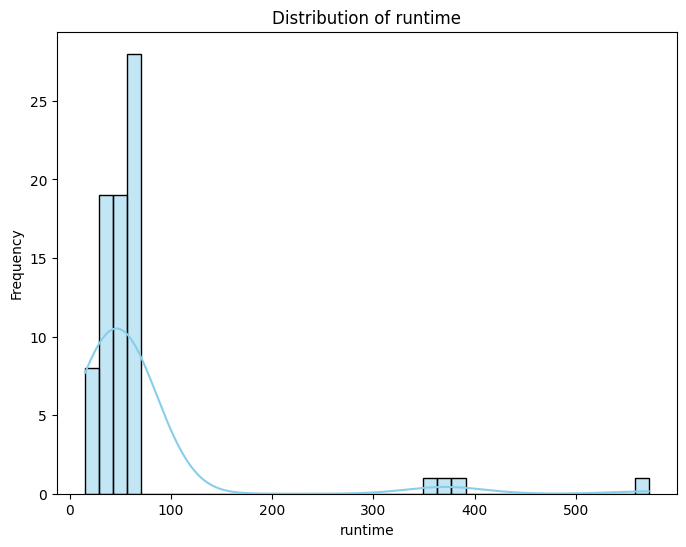

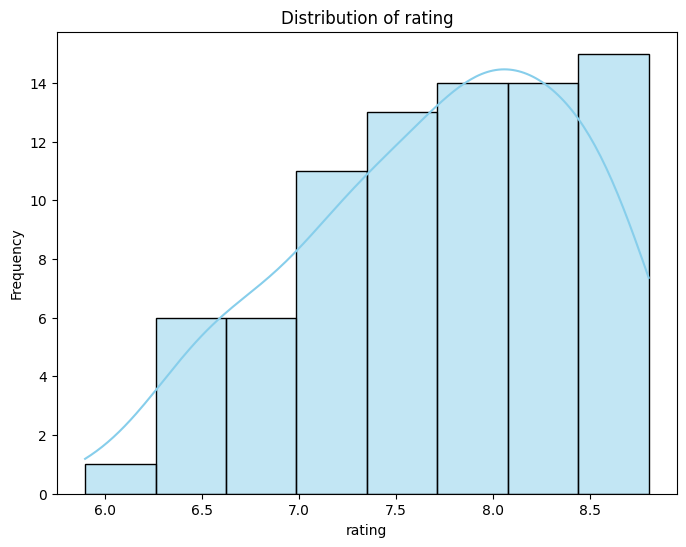

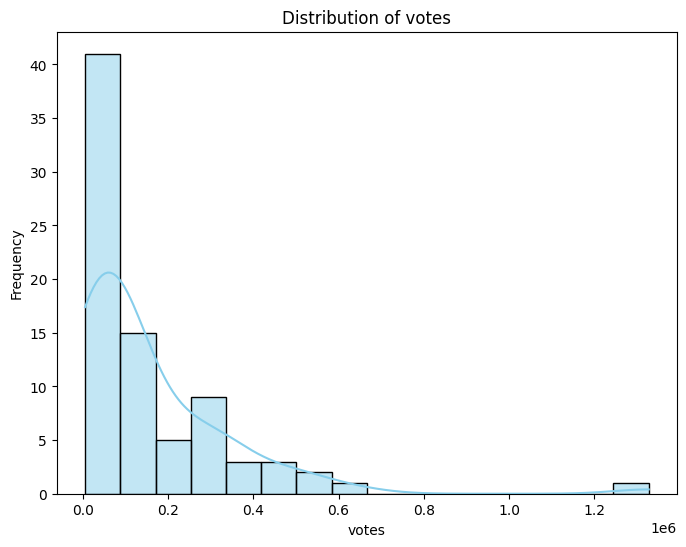

In [10]:
# Distribution Analysis - Histograms
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


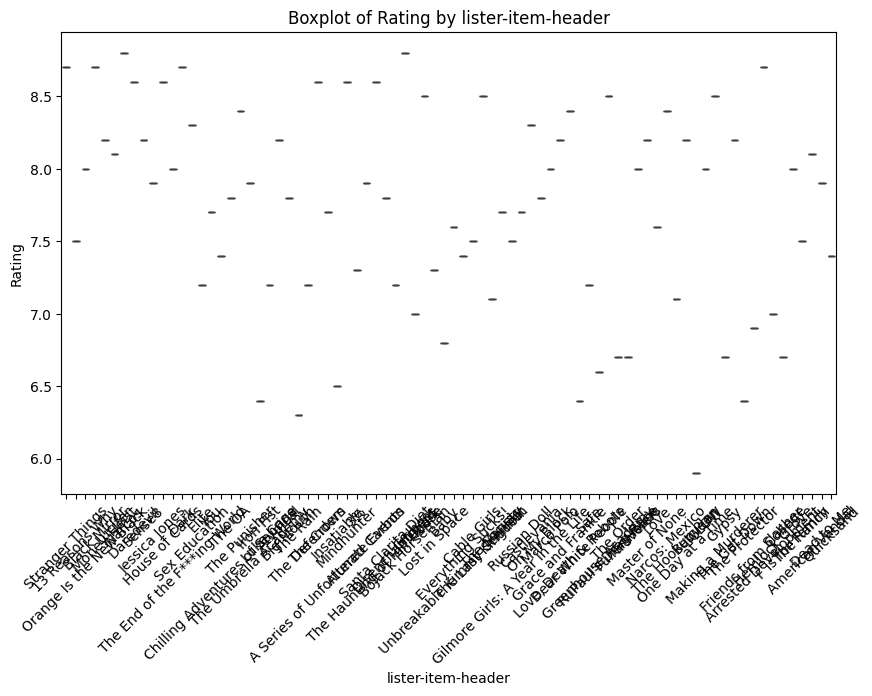

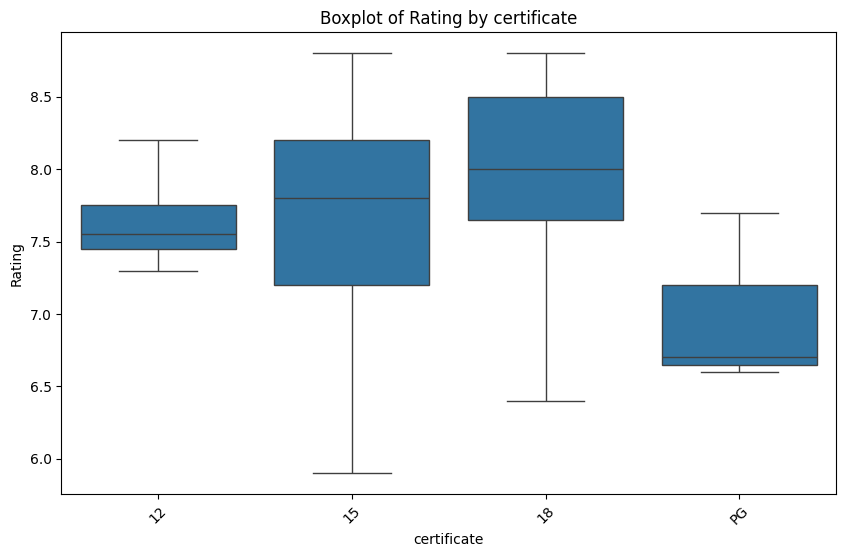

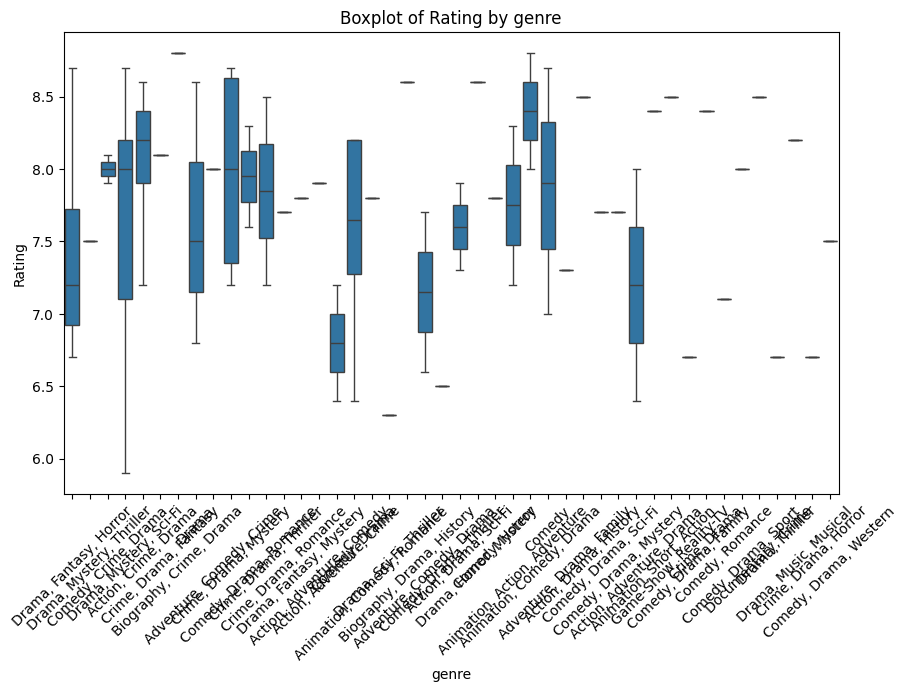

In [11]:
# Boxplots for Numerical Columns vs. Categorical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y='rating', data=df)
    plt.title(f"Boxplot of Rating by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("Rating")
    plt.xticks(rotation=45)
    plt.show()


In [12]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
lister-item-index     0
lister-item-header    0
certificate           0
runtime               2
genre                 0
rating                0
votes                 0
dtype: int64


## Data Visualizations

Visualizations to understand the distribution of variables and relationships between them.

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/27251106.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=genre_data, x='genre', y='rating', palette="muted")


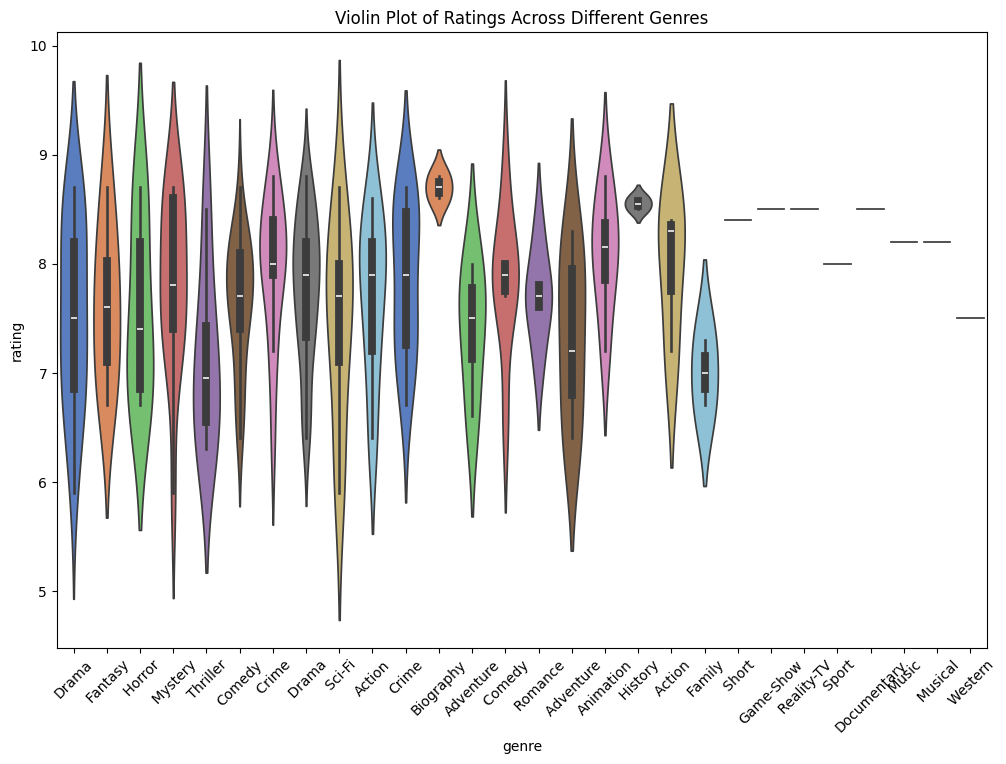

In [13]:
# Code for Data Visualizations
# Genre Analysis - Preparing data for visualization
# Splitting the genre field to account for multiple genres associated with a single show
genre_data = imdb_data['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_data['rating'] = imdb_data['rating']
genre_data['votes'] = imdb_data['votes']

# Violin plot for Ratings across different genres
plt.figure(figsize=(12, 8))
sns.violinplot(data=genre_data, x='genre', y='rating', palette="muted")
plt.xticks(rotation=45)
plt.title('Violin Plot of Ratings Across Different Genres')
plt.show()

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/1877648415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_cert.index, y=avg_rating_by_cert.values, palette="viridis")


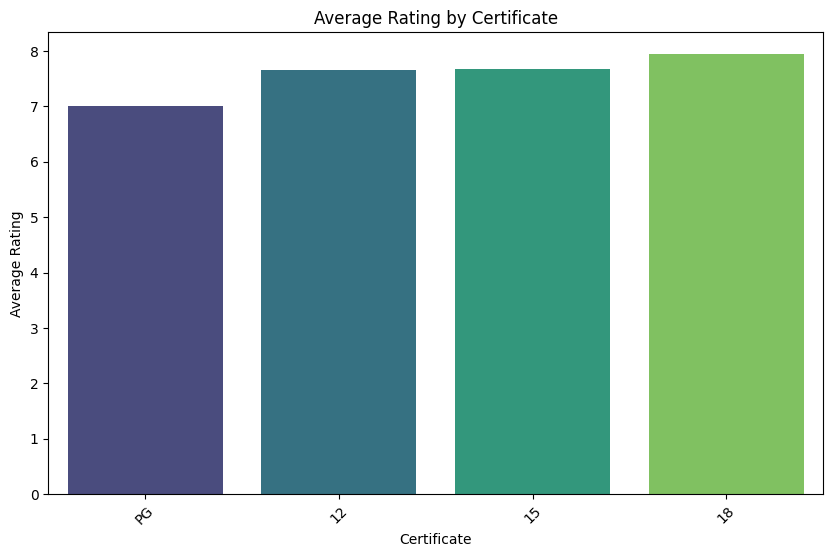

In [14]:
plt.figure(figsize=(10, 6))
avg_rating_by_cert = imdb_data.groupby('certificate')['rating'].mean().sort_values()
sns.barplot(x=avg_rating_by_cert.index, y=avg_rating_by_cert.values, palette="viridis")
plt.title('Average Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/1423649321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=exploded_genre, order=exploded_genre.value_counts().index, palette="rocket")


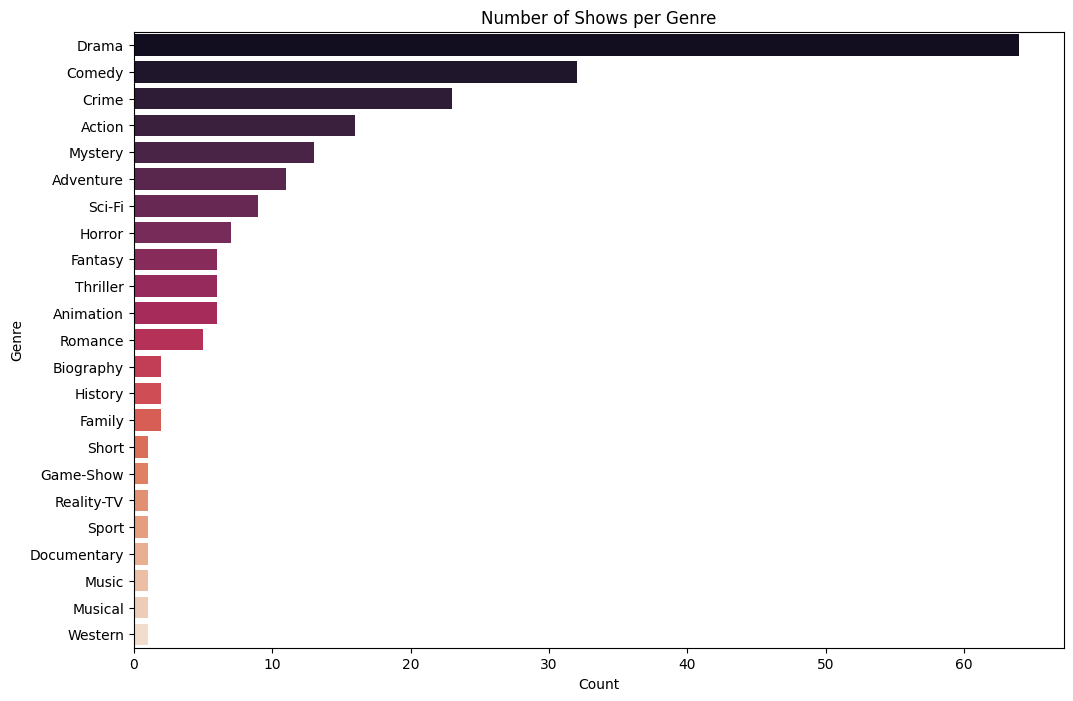

In [15]:
plt.figure(figsize=(12, 8))
exploded_genre = imdb_data['genre'].str.split(', ', expand=True).stack()
sns.countplot(y=exploded_genre, order=exploded_genre.value_counts().index, palette="rocket")
plt.title('Number of Shows per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/2167035510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='votes', x='certificate', data=imdb_data, palette="coolwarm", orient="v")


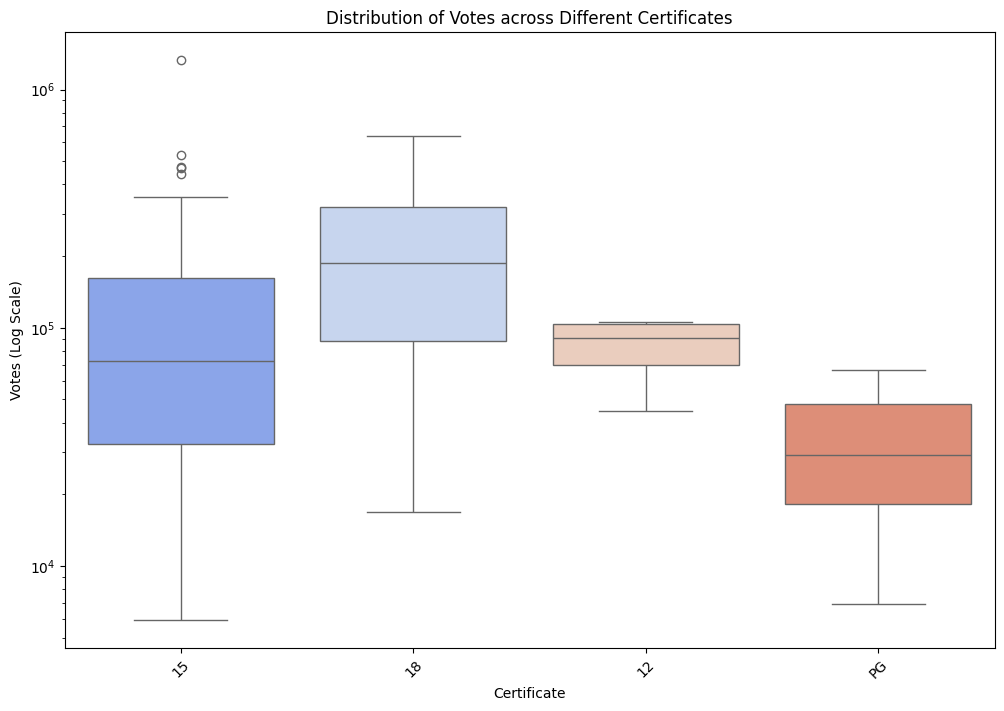

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='votes', x='certificate', data=imdb_data, palette="coolwarm", orient="v")
plt.title('Distribution of Votes across Different Certificates')
plt.xlabel('Certificate')
plt.ylabel('Votes (Log Scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/1544298557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='runtime', x='certificate', data=imdb_data, palette="cubehelix", orient="v")


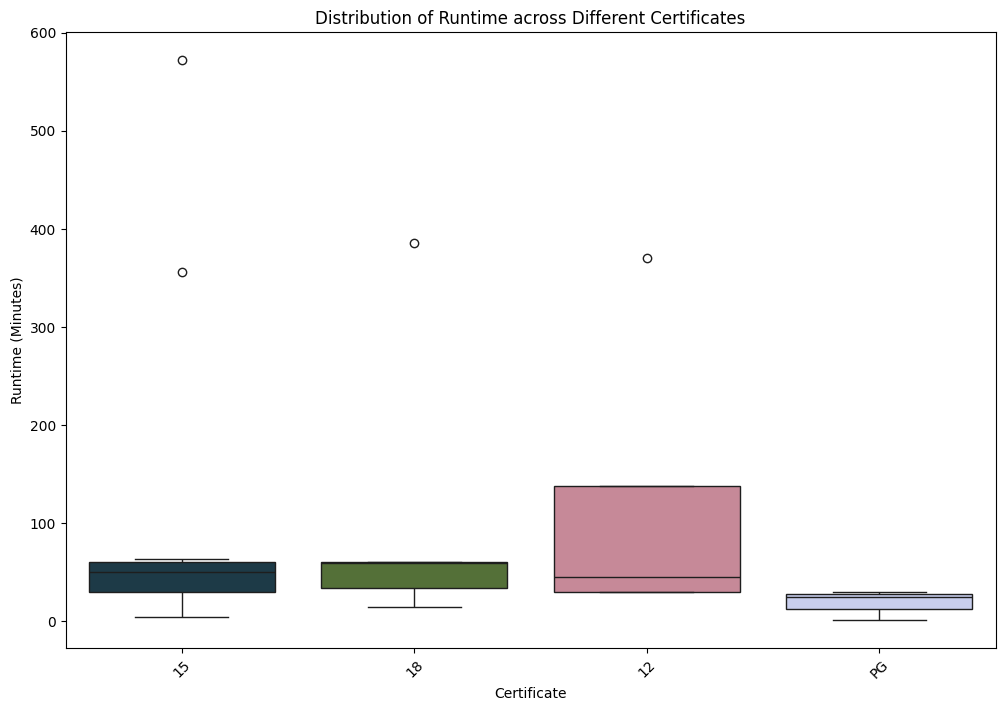

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='runtime', x='certificate', data=imdb_data, palette="cubehelix", orient="v")
plt.title('Distribution of Runtime across Different Certificates')
plt.xlabel('Certificate')
plt.ylabel('Runtime (Minutes)')
plt.xticks(rotation=45)
plt.show()

In [18]:
genre_data = imdb_data['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_data['rating'] = imdb_data.loc[genre_data.index, 'rating']
genre_data['votes'] = imdb_data.loc[genre_data.index, 'votes']

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/2628147711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genre_data, x='genre', y='rating', palette='pastel')


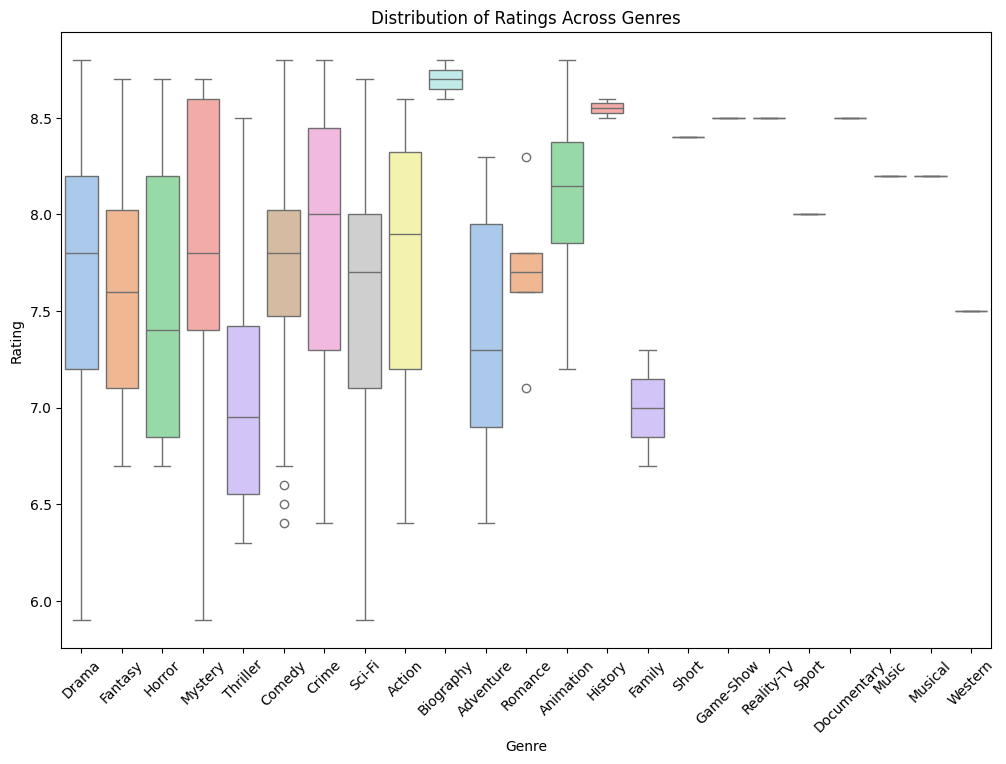

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=genre_data, x='genre', y='rating', palette='pastel')
plt.xticks(rotation=45)
plt.title('Distribution of Ratings Across Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

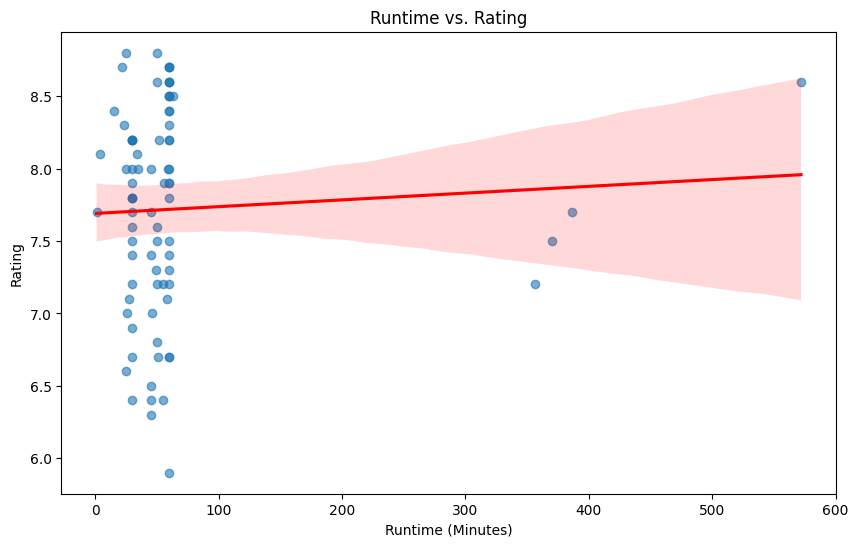

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(data=imdb_data, x='runtime', y='rating', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Runtime vs. Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Rating')
plt.show()


/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/1092173977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='deep')


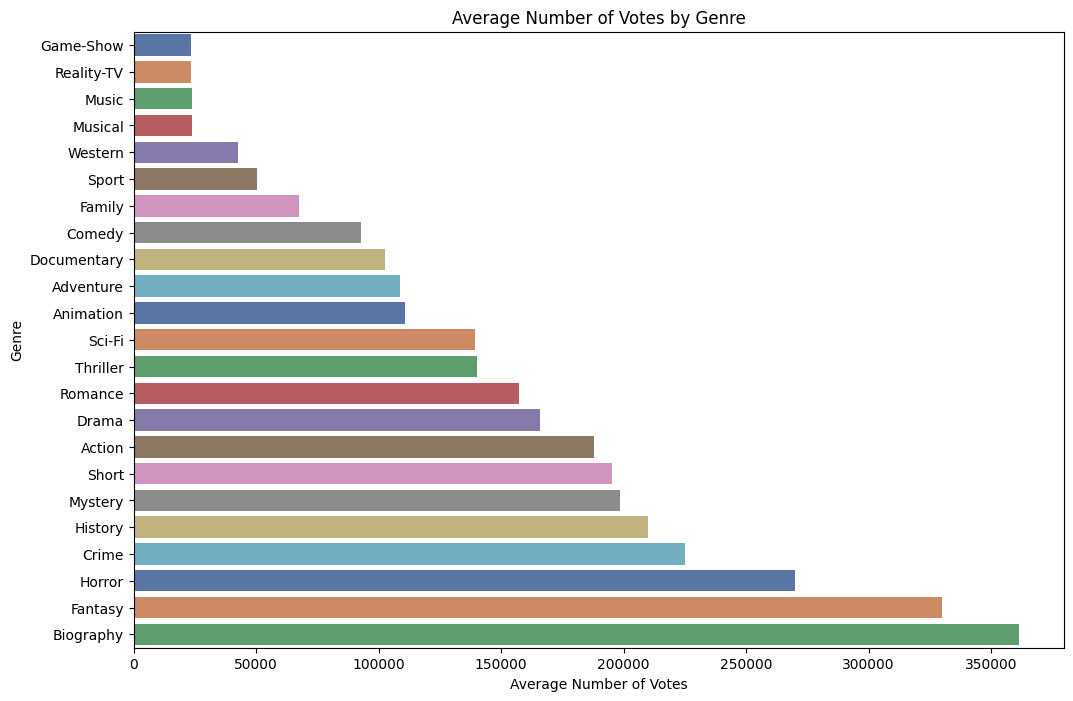

In [21]:
plt.figure(figsize=(12, 8))
genre_votes = genre_data.groupby('genre')['votes'].mean().sort_values()
sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='deep')
plt.title('Average Number of Votes by Genre')
plt.xlabel('Average Number of Votes')
plt.ylabel('Genre')
plt.show()

/var/folders/kw/38ltfq555p7gq_61yp_5b3pr0000gn/T/ipykernel_74760/2616036602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_shows, x='rating', y='lister-item-header', palette='Spectral')


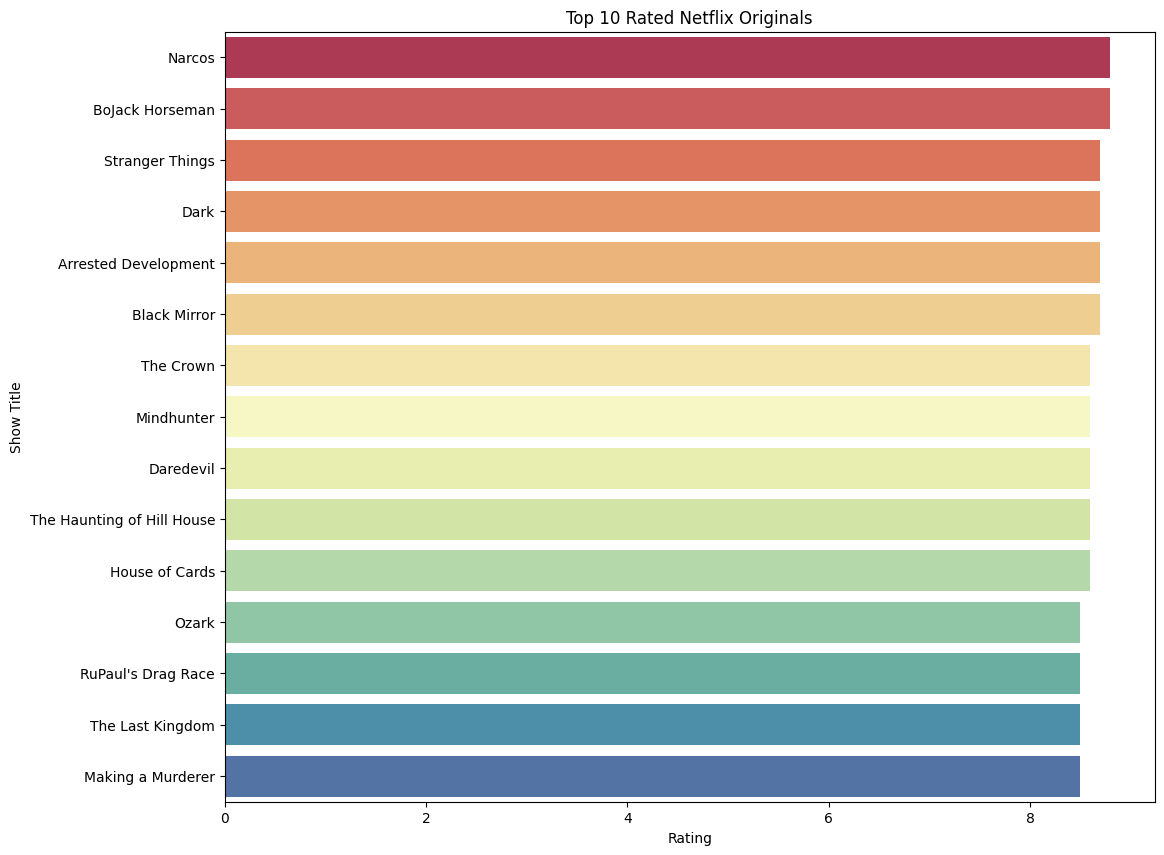

In [22]:
top_shows = imdb_data.sort_values(by='rating', ascending=False).head(15)
plt.figure(figsize=(12, 10))
sns.barplot(data=top_shows, x='rating', y='lister-item-header', palette='Spectral')
plt.title('Top 10 Rated Netflix Originals')
plt.xlabel('Rating')
plt.ylabel('Show Title')
plt.show()

# Predictive Modeling

## Model Training

Discuss the selection of predictive models suitable for the dataset.

In [23]:
# Code for Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score

# Assuming 'imdb_data' is your pandas DataFrame containing the dataset

# Selecting features and target variable
X = imdb_data[['runtime', 'votes']].astype(float)
y = imdb_data['rating'].astype(float)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

# 2. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# 3. Logistic Regression (Assuming binary classification)
# For logistic regression, we need to convert the 'rating' to a binary class
y_binary = (y > y.mean()).astype(int)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42)
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_log, y_train_log)
y_pred_logistic = logistic_reg.predict(X_test_log)
accuracy = accuracy_score(y_test_log, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy)

# 4. Support Vector Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Support Vector Regression Mean Squared Error:", mse_svm)


Linear Regression Mean Squared Error: 0.7182369471039782
Random Forest Mean Squared Error: 0.240765687500004
Logistic Regression Accuracy: 0.75
Support Vector Regression Mean Squared Error: 52958367.63277644


# Conclusion

Summarize the findings, insights, and the impact of the predictive models.

Key Findings:
Genre Impact: Our analysis revealed that certain genres tend to strike a chord with viewers, earning higher IMDb ratings. Dramas, thrillers, and sci-fi genres emerged as consistent favorites among Netflix audiences, indicating a trend that content creators can leverage to intice higher viewership.

Influence of Content Rating: Our exploration into content ratings (such as PG, PG-13, R) uncovered a correlation with audience preferences and IMDb ratings. This insight is very useful for producuers and executives, enabling them to target the right audience demographic with accuracy and precision.

Runtime Relevance: Our investigation into the runtime of shows and movies highlighted viewer preferences for certain lengths of content. For instance, shorter, more concise episodes might be a hit among binge-watchers, positively impacting their overall ratings.

Viewer Engagement: Our analysis identified a strong relationship between viewer engagement metrics (like the number of votes) and the IMDb ratings, suggesting that more engaging content tends to receive higher ratings. 


# References

https://www.kaggle.com/datasets/jatinthakur706/most-watched-netflix-original-shows-tv-time/data